## Artificial Intelligence in Cybersecurity -- Final Project ##
# CAPTCHA Cracking #

In order to show how what I have learned throughout the Spring 2020 semester diving into the field of machine learning, artificial intelligence, and deep learning in regards to cybersecurity, I chose to attempt creating a CAPTCHA image cracker.

This project will be a shallow dive into this field, which I plan to focus in on further in the future.  As such, this project has the following initial goals:



*   How to break Simple CAPTCHA
*   Design a Model which will take samples of Simple CAPTCHA and learn how to accurately answer the posed problem.
*   Build the foundation for a Model which will work with more complex CAPTCHA samples.

# Useful Definitions #

**CAPTCHA**:
**C**onpletely **A**utomated **P**ublic **T**uring Test to Tell **C**omputers and **H**umans **A**part.

 According to the Official CAPTCHA site, "CAPTCHA is a program that protects websites against bots by generating and grading tests that humans can pass but current computer programs cannot. For example, humans can read distorted text as the one shown below, but current computer programs can't."

The hope is that current computer programs cannot solve these problems, but this project, and projects by others, will prove this claim incorrect.

# Resources #

To complete this project I took concepts and libraries that we've learned throughout the semester and applied them to the problem at hand: cracking captcha using machine learning.  In order to understand the base concepts of this project, I also utilized the following resources to get a better grasp on what could be done:

* *Machine Learning for Cybersecurity* Published by Packt
* Captcha Samples from PacktPublishing on Github [Found here](https://github.com/PacktPublishing/Machine-Learning-for-Cybersecurity-Cookbook/tree/master/Chapter05/CAPTCHA%20Breaker)
* OpenCV python library notes by jrosebr1 on Github [Found here](https://github.com/jrosebr1/imutils)
* OpenCV Flags [Found here](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)
* *Embeddings in Keras* [Found here](https://jovianlin.io/embeddings-in-keras/)
* Keras GitHub for Error-Code Review [Found here](https://github.com/keras-team)
* *Sequential Model - Keras* Youtube Video by Data Talks [Found here](https://www.youtube.com/watch?v=VGCHcgmZu24)
* Keras Models from the Keras documentation [Found here](https://keras.io/layers/core/)
* Using GANs for Text CAPTCHA Breaking Presentation [Found here](https://www.youtube.com/watch?v=bStNa8ej-hg)  With more details in the paper [Found here](https://dl.acm.org/doi/10.1145/3243734.3243754)
* Applications of Deep Neural Networks: GANs [Found here](https://github.com/jeffheaton/t81_558_deep_learning/blob/08c5e84a518d2f017cb5aab5c6d7bb84559a4738/t81_558_class_07_2_Keras_gan.ipynb)


# Let's begin... #

In [0]:
# In order to freely deal with and process images, use the OpenCV and Imutils
#     functionality in this github repository: https://github.com/jrosebr1/imutils 

#!pip install opencv-python imutils
#!pip install sklearn
#!pip install keras
#!pip install tensorflow

In [1]:
# This area will be used to import all necessary libraries for the project.

# For the main program
import os
import cv2
import imutils
from imutils import paths
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

# For the GANs experiment -- may need to be moved into a seporate notebook.
'''
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
'''

Using TensorFlow backend.


'\nimport tensorflow as tf\nfrom tensorflow.keras.layers import Input, Reshape, Dropout, Dense \nfrom tensorflow.keras.layers import Flatten, BatchNormalization\nfrom tensorflow.keras.layers import Activation, ZeroPadding2D\nfrom tensorflow.keras.layers import LeakyReLU\nfrom tensorflow.keras.layers import UpSampling2D, Conv2D\nfrom tensorflow.keras.models import Sequential, Model, load_model\nfrom tensorflow.keras.optimizers import Adam\nimport numpy as np\nfrom PIL import Image\nfrom tqdm import tqdm\nimport time\nimport matplotlib.pyplot as plt\n'

In [0]:
# Uncomment this block to test what flags you have access to from cv2

#for c in dir(cv2):
#  if c.startswith('COLOR_'): print(c)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
CO

In [0]:
# Change the following path based where samples are stored.
# The following code boxes will be split between a greyscale version of the
#     project and a RBG version.  Both stem from items found in the following location.

captchaSamples = "/content/drive/My Drive/Jupyter Notebook Projects/captcha_images" 
# Change the above if items are stored elsewhere on your host
captchas = [
           os.path.join(captchaSamples, f) for f in os.listdir(captchaSamples)
]

Below is an exploration into Generative Adversarial Networks (GANs) for use with CAPTCHA images.  The goal here is to create a GANs which can create realistic CAPTCHA images.  Those images can then be used further below to supply further character samples for the supervised learning model below.

This section experimental.  There are a few ideas which may go into play here; namely:
* Will this work only with full CAPTCHA images, of which there are over 9000 samples which can be fed into the GAN?
* Will this work with the individual characters, of which there are far fewer samples?
* Where is it best to use the GAN model, CAPTCHA or character?
* Can a square GAN create a useful CAPTCHA?
* How best to re-size GAN outputs into rectangles

In [13]:
'''
This area of the code is deisgned to take the CAPTCHA samples indicated above
and generate further samples.  To do this a Generative Adversarial Network (GAN)
is being designed to do so.  This gives further training materials for slicing 
and using as training for this, and future models.
'''

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

#GENRATE_RES 4 or higher will go beyond what Google Collab can handle.
GENERATE_RES = 3 # Generation resolution factor 
# (1=32, 2=64, 3=96, 4=128, etc.)
GENERATE_SQUARE = 32 * GENERATE_RES # rows/cols (should be square)
IMAGE_CHANNELS = 3

# Preview image 
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

# Size vector to generate images from
SEED_SIZE = 100

# Configuration
DATA_PATH = captchaSamples
EPOCHS = 50
BATCH_SIZE = 32
BUFFER_SIZE = 60000

print(f"Will generate {GENERATE_SQUARE}px square images.")



Will generate 96px square images.


In [0]:
# This series of code will save a NumPy file for preprocessed work which can 
#     be used in future attempts at creating CAPTCHA, or can be added to the
#     preprocessing of the CAPTCHA below. 

training_binary_path = os.path.join(DATA_PATH,
        f'training_data_{GENERATE_SQUARE}_{GENERATE_SQUARE}.npy')

print(f"Looking for file: {training_binary_path}")

if not os.path.isfile(training_binary_path):
  start = time.time()
  print("Loading training samples...")

  training_data = []
  fake_CAP = os.path.join(DATA_PATH,'GAN_CAPTCHA')
  for filename in tqdm(os.listdir(fake_CAP)):
      path = os.path.join(fake_CAP, filename)
      samp = Image.open(path).resize((GENERATE_SQUARE,
            GENERATE_SQUARE),Image.ANTIALIAS)
      training_data.append(np.asarray(samp))

  training_data = np.reshape(training_data,(-1,GENERATE_SQUARE,
            GENERATE_SQUARE,IMAGE_CHANNELS))
  training_data = training_data.astype(np.float32)
  training_data = training_data / 127.5 - 1.


  print("Saving training image binary...")
  np.save(training_binary_path, training_data)
  elapsed = time.time()-start

  print (f'Image preprocess time: {hms_string(elapsed)}')

else:
  print("Loading previous training binaries...")
  training_data = np.load(training_binary_path)

Looking for file: /content/drive/My Drive/Jupyter Notebook Projects/captcha_images/training_data_96_96.npy
Loading previous training binaries...


In [0]:
# Using TensorFlow 'Dataset' object to hold the training data, allowing for
#     shuffling and other manipulation techniques.
#     Need to review further.

train_dataset = tf.data.Dataset.from_tensor_slices(
    training_data
    ).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
def build_generator(seed_size, channels):
    generator = Sequential()

    generator.add(Dense(4*4*256,activation="relu",input_dim=seed_size))
    generator.add(Reshape((4,4,256)))

    generator.add(UpSampling2D())
    generator.add(Conv2D(256,kernel_size=3,padding="same"))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Activation("relu"))

    generator.add(UpSampling2D())
    generator.add(Conv2D(256,kernel_size=3,padding="same"))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Activation("relu"))
   
    # Output resolution, additional upsampling
    generator.add(UpSampling2D())
    generator.add(Conv2D(128,kernel_size=3,padding="same"))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Activation("relu"))

    if GENERATE_RES>1:
      generator.add(UpSampling2D(size=(GENERATE_RES,GENERATE_RES)))
      generator.add(Conv2D(128,kernel_size=3,padding="same"))
      generator.add(BatchNormalization(momentum=0.8))
      generator.add(Activation("relu"))

    # Final CNN layer
    generator.add(Conv2D(channels,kernel_size=3,padding="same"))
    generator.add(Activation("tanh"))

    return generator


def build_discriminator(capShape):
    discriminator = Sequential()

    discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=capShape, 
                     padding="same"))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Dropout(0.25))
    discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
    discriminator.add(BatchNormalization(momentum=0.8))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Dropout(0.25))
    discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    discriminator.add(BatchNormalization(momentum=0.8))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Dropout(0.25))
    discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    discriminator.add(BatchNormalization(momentum=0.8))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Dropout(0.25))
    discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    discriminator.add(BatchNormalization(momentum=0.8))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Dropout(0.25))
    discriminator.add(Flatten())
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

In [0]:
def save_images(cnt,noise):
  sampArr = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)
  
  genSamps = generator.predict(noise)

  genSamps = 0.5 * genSamps + 0.5

  count = 0
  for row in range(PREVIEW_ROWS):
      for col in range(PREVIEW_COLS):
        r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        sampArr[
                    r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE
                    ] = generated_images[count] * 255
        count += 1

          
  outFold = os.path.join(DATA_PATH,'output')
  if not os.path.exists(outFold):
    os.makedirs(outFold)
  
  filename = os.path.join(output_path,f"train-{cnt}.png")
  im = Image.fromarray(sampArr)
  im.save(filename)

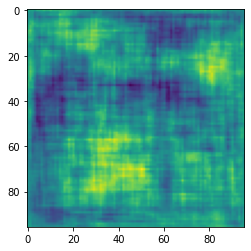

In [0]:
generator = build_generator(SEED_SIZE, IMAGE_CHANNELS)

noise = tf.random.normal([1, SEED_SIZE])
genSamps = generator(noise, training=False)

plt.imshow(genSamps[0, :, :, 0])

In [0]:
capShape = (GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS)

discriminator = build_discriminator(capShape)
decision = discriminator(genSamps)
print (decision)

tf.Tensor([[0.49930397]], shape=(1, 1), dtype=float32)


In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(samps):
  seed = tf.random.normal([BATCH_SIZE, SEED_SIZE])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    genSamps = generator(seed, training=True)

    outReal = discriminator(samps, training=True)
    outFake = discriminator(genSamps, training=True)

    genL = generator_loss(outFake)
    disL = discriminator_loss(outReal, outFake)
    

    genGrad = gen_tape.gradient(genL, generator.trainable_variables)
    disGrad = disc_tape.gradient(disL, discriminator.trainable_variables)

    optGen.apply_gradients(zip(genGrad, generator.trainable_variables))
    optDis.apply_gradients(zip(disGrad, discriminator.trainable_variables))
  return genL, disL

In [0]:
def train(dataset, epochs):
  fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS, SEED_SIZE))
  start = time.time()

  for epoch in range(epochs):
    epoch_start = time.time()

    genLost = []
    disLost = []

    for samps in dataset:
      t = train_step(samps)
      genLost.append(t[0])
      disLost.append(t[1])

    gLoss = sum(genLost) / len(genLost)
    dLoss = sum(disLost) / len(disLost)

    epoch_elapsed = time.time() - epoch_start
    print (f'Epoch {epoch+1}, gen loss={g_loss},disc loss={d_loss},'\
           ' {hms_string(epoch_elapsed)}')
    
    saveGen(epoch, fixed_seed)

  elapsed = time.time() - start
  print (f'Training time: {hms_string(elapsed)}')

In [0]:
train(train_dataset, EPOCHS)

In [0]:
generator.save(os.path.join(DATA_PATH,"cap_generator.h5"))

Throughout the functions of this project you'll notice a thematic naming convention.  For clarity, when something is annotated with a *G* it will be used to work on the greyscale images of the CAPTCHA.  When something is annotated with a *C* it will be used to work on the RGB (or color) oriented text.

A question which may come to mind is why these items were worked on side-by-side in a single version of each function.  While logistically this is possible, and was the original design, this ends up being messy and convoluted.  In order to keep the code clean and consise, the below method was utilized instead.

In future endeavours, this will likely be reviewed again and re-joined.

In [0]:
# The following will make two versions of every CAPTCHA:
#     A greyscale image, and a colored version.  This should help train the ML to
#         identify and understand both greyscale and color versions of the CAPTCHA chars.

def preProcGrey(samp):
  grey = cv2.cvtColor(samp, cv2.COLOR_BGR2GRAY)
  greyBord = cv2.copyMakeBorder(grey, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
  # for cv2.copyMakeBorder(src, top, bottom, left, right, borderType, value)
  preprocG = cv2.threshold(
      greyBord, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
  )[1]
  
  return greyBord, preprocG

# -------------------------------------------------------------------------
# Above there is a commented out for loop to pull flags from cv2.  This helped
#     identify the flag necessary for the RGB version of each CAPTCHA.

def preProcCol(samp):
  #                                             R = Red | G = Green | B = Blue
  #samp = cv2.imread(samp, CV_8UC1)     # Issue identified: threshold() is looking for greyscale image.
  col = cv2.cvtColor(samp, cv2.COLOR_BGR2RGB) #Allows for RGB hues
  colBord = cv2.copyMakeBorder(col, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
  preprocC = cv2.threshold(
      colBord, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
  )[1]

  return colBord, preprocC

In [0]:
# These functions will store label information for the captcha sample.
# Seporate samples must be made because there will be a duplicate set of samples
#     and labels, one for greyscale and one for RGB.

def captchaLabelG(captchaSamples):
  samples = os.path.basename(captchaSamples)  # Pulling out one sample
  labelG = samples.split(".")[0]  # Initial label pulled from image name, taking out the '.' and anything after.

  return labelG

# -------------------------------------------------------------------------

def captchaLabelC(captchaSamples):
  samples = os.path.basename(captchaSamples)
  labelC = samples.split(".")[0]

  return labelC

In [0]:
# Identify the contours of the simple CAPTCHA, then define the rectangles around
#    identified symbols.  Prep to crop.  This can be done for both color and greyscale

def boundariesG(bounds):
  recG = []

  # Identifies the space around the character for later use.
  for bound in bounds:
    (x, y, w, h) = cv2.boundingRect(bound)
    if w / h > 1.25:
      half_width = int(w / 2)
      recG.append((x, y, half_width, h))
      recG.append((x + half_width, y, half_width, h))
    else:
      recG.append((x, y, w, h))

  return recG

# -------------------------------------------------------------------------
# NOTE: When making a near mirror image of the same function, it can be easy
#       to loose track of indentations--this can swallow a function and leave it
#       unusuable.  Also unnoticed until running the main execution.  Be mindful.

def boundariesG(bounds):
  recC = []

  for bound in bounds:
    (x, y, w, h) = cv2.boundingRect(bound)
    if w / h > 1.25:
      half_width = int(w / 2)
      recC.append((x, y, half_width, h))
      recC.append((x + half_width, y, half_width, h))
    else:
      recC.append((x, y, w, h))

  return recC

In [0]:
# As the name suggests, the cutting board is cutting borders around the individual
#     characters in the input CAPTCHA (CAPTCHA samples here for creating the corpus
#     and eventually the submission of the goal CAPTCHA)
# The border takes one sample and runs it through the pre-processing function
#     before finding the contours (outline) necessary for the seporation of characters.

def cuttingBoardersG(captchaSamples):
  samp = cv2.imread(captchaSamples) # Initial sample
  # cv2.imread(filename[, flags]) where flags are: UNCHANGED, GRAYSCALE, COLOR, 
  #                                ANYDEPTH, ANYCOLOR, LOAD_GDAL, etc.
  greyBord, preprocG = preProcGrey(samp)

  bordersG = cv2.findContours(
      preprocG.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
  )
  # cv2.findContours(image, mode, method)

  bordersG = bordersG[0]
  recG = boundariesG(bordersG)
  recG = sorted(recG, key = lambda x: x[0])

  return greyBord, recG

# -------------------------------------------------------------------------

def cuttingBoardersC(captchaSamples):
  samp = cv2.imread(captchaSamples)
  colBord, preprocC = preProcCol(samp)
  bordersC = cv2.findContours(
      preprocC.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE
      )
  
  bordersC = bordersC[0]
  recC = bounariesC(bordersC)
  recC = sorted(recC, key = lambda x: x[0])
  
  return colBord, recC

In [0]:
# In order to ensure the image is properly cropped, it will be identified via
#     the rectangle from the cuttingBoarders function and then identified as a single
#     character to be returned to the calling function.

def trimmerG(greyBord, recG):
  x, y, w, h = recG

  charImgG = greyBord[y - 2 : y + h + 2, x - 2 : x + w + 2]

  return charImgG

# -------------------------------------------------------------------------

def trimmerC(colBord, recC):
  x, y, w, h = recC

  charImgC = colBord[y - 2 : y + h + 2, x - 2 : x + w + 2]

  return charImgC

An important thing to note is the use of naming conventions throughout the project, but specifically in the function defined below.  While working on this project I ran into an issue with Sequental Modeling (which is a focus in the next section).  I assumed this was an issue with Keras or a variable I defined in the deep learning portion of the project.  I was incorrect!

The error in question was the mis-placing of a veriable call in the following block of code.  This is important to note because I expect this is a common issue, especially with larger notebooks or codes.  Ensuring that naming conventions make sense and are easy for both the code writer and a code reader to understand is vital.

Here I switched currentCharG for labelG in the line:

> saveG = os.path.join(captchaOut, currentCharG)


I did not realize this issue for quite some time and ended up diving deeper into errors in Keras.  The reason this caused an issue that instead of having 32 sub-folders in the captchaOut location, I ended up with over 9600.  During the training stage I ended up looking for 32 folders and being unable to train the model properly as the vectorization was wrong.

Instead of a folder for all images labeled '2', which holds all variations of '2' found in the samples (which is what is now the result), I initially had folders labeled something like '222N', where the folder consisted of a '2', a '2', a '2', and a 'N'.  Needless to say, the training did not execute properly and the model failed to properly predict an input CAPTCHA later on.

In [0]:
# This is the main folder for the cut samples, which will be organized based on
# the label for that character (labels 2 - 9, and A - Z, excluding I and O).
# Although Greyscale and Colorscale have been separated to this point, all samples
# Should be stored in the same location for training.
# Below it is stored in a location that will not disappear if colab needs to be refreshed.
captchaOut = "/content/drive/My Drive/Jupyter Notebook Projects/CharImgs"
charCounts = {}

def CropingRecsG(greyBord, recG, labelG):
  for Grec, currentCharG in zip(recG, labelG):
    charImG = trimmerG(greyBord, Grec)

    # Label and Recs are reviewed at the same time so that the character is 
    #     isolated and properly labeled.  The only works if the original CAPTCHA
    #     is titled the exact sequence of the CAPTCHA itself.
    saveG = os.path.join(captchaOut, currentCharG)
    if not os.path.exists(saveG):
      os.makedirs(saveG)
    
    charCount = charCounts.get(currentCharG, 1)

    pathwayG = os.path.join(saveG, str(charCount) + ".png")
    cv2.imwrite(pathwayG, charImG)

    charCounts[currentCharG] = charCount + 1

# -------------------------------------------------------------------------

def CropingRecsC(colBord, recC, labelC):
  for Crec, currentCharC in zip(recC, labelC):
    charImC = trimmerC(colBord), Crec

    saveC = os.path.join(captchaOut, labelC)
    if not os.path.exists(saveC):
      os.makedirs(saveC)
    
    charCount = charCounts.get(currentCharC, 1500)  # Avoid overwriting greyscale images

    pathwayC = os.path.join(saveC, str(charCount) + ".png")
    cv2.imwrite(pathwayC, charImC)

    charCount[currentCharC] = charCount + 1

In [9]:
# Initiator of the program.  Consider this the "Main".
# Runs through greyscale first, the colorscale.  All cut-outs appear in the same
# directory series for training.

for captcha in captchas:
  labelG = captchaLabelG(captcha)
  greyBoard, recG = cuttingBoardersG(captcha)
  
  if len(recG) != 4: continue
  
  CropingRecsG(greyBoard, recG, labelG)

# -------------------------------------------------------------------------
# These two could be joined as one call.  Long-term goal is to join all mirror
#     functions into one for both grey and color.

'''for captcha in captchas:
  labelC = captchaLabelC(captcha)
  colBoard, recC = cuttingBoardersC(captcha)
  if len(recC) != 4:
    continue

  CropingRecsC(colBoard, recC, labelC)'''

'for captcha in captchas:\n  labelC = captchaLabelC(captcha)\n  colBoard, recC = cuttingBoardersC(captcha)\n  if len(recC) != 4:\n    continue\n\n  CropingRecsC(colBoard, recC, labelC)'

At this point the preprocessing for both the greyscale and RGB versions of the sample CAPTCHA have been set up.  The output should be a series of characters placed in labeled folders.  Noteably, these folders will not have the numbers 1 or 0, nor the letters I or O as these can easily be mistaken for one another by human and machine.


Next is the machine learning portion of this project, where a neural network will be trained on these samples to learn how to identify each character individually.  All libraries necessary for this portion of the project were added above.  All packages can be installed above by commenting out the pip commands.

In [0]:
# Identifying and working with the samples organized in the director created above.
# Re-identified here in case the file path requires more than just the directory name.

CharTrainImg = "/content/drive/My Drive/Jupyter Notebook Projects/CharImgs"  # Change as needed based on folder location

In [0]:
# Ensure sample is an appropriate size for evalutation.

def resizingRecsG(charSamp, chWidth, chHeight):
  (h, w) = charSamp.shape[:2]
  if w > h:
    charSamp = imutils.resize(charSamp, width = chWidth)
    # imutils.resize(image, width = None, height = None, inter = cv2.INTER_AREA)
  else:
    charSamp = imutils.resize(charSamp, height = chHeight)
  
  paddedW = int((chWidth - charSamp.shape[1]) / 2.0)
  paddedH = int((chHeight - charSamp.shape[0]) / 2.0)
  
  # cv2.copyMakeBorder(image, top_len, bottom_len, left_len, right_len, borderType, value)
  imgBord = cv2.copyMakeBorder(
      charSamp, paddedH, paddedH, paddedW, paddedW, cv2.BORDER_REPLICATE
  )
  imgBordResize = cv2.resize(imgBord, (chWidth, chHeight))

  return imgBordResize

In [0]:
# Take in the image, resize it as necessary, identify an array of the image's value.

def readImgG(pathway):
  Samp = cv2.imread(pathway)
  Samp = cv2.cvtColor(Samp, cv2.COLOR_BGR2GRAY)  # Goal here is to not need to greyscale
  # cv2.cvtColor(source, flag)
  Samp = resizingRecsG(Samp, 20, 20)
  Samp = np.expand_dims(Samp, axis = 2)

  return Samp

In [0]:
# Go through each image and identify it's label.  Store each into arrays.

samples = []
labels = []

for pathway in imutils.paths.list_images(CharTrainImg):
  imgPath = readImgG(pathway)
  label = pathway.split(os.path.sep)[-2]
  samples.append(imgPath)
  labels.append(label)

# Convert arrays into NumPy arrays for training.
samples = np.array(samples, dtype="float") / 255.0
labels = np.array(labels)

In [0]:
# Set up train_test_split from sklearn.  Training/Test ration 70/30
# random_state --> random number generator.  If not seeded, replaced by np.random

(X_train, X_test, y_train, y_test) = train_test_split(
    samples, labels, test_size = 0.3, random_state = 11
)

labelBin = LabelBinarizer().fit(y_train)
y_train = labelBin.transform(y_train)
y_test = labelBin.transform(y_test)

In [15]:
'''
Setting up the Keras Sequential model to train.
Now into the deep learning aspect.  Interesting quote from Data Talks which
    may help to identify when something is a deep learning model:
    "When you think of layers, you think of onions, orgers, or deep learning"

Activations are an area I need to do further study on.  Activation options:
    elu -- exponential linear unit; returns x if x > 0; alpha * (exp(x)-1) if x < 0
    softmax -- softmax activation function; returns tensor output
    selu -- scaled exponential Linear Unit; returns scale * elu(x, alpha)
            to be used with initialization "lecun_normal"; dropout "AlphaDropout:
    softplus -- softplus activation function; returns log(exp(x) +1)
    softsign -- softsign activation function; returns x / (abs(x) + 1)
    relu -- rectified linear unit; returns element-wise max(x, 0) tensor
    tanh -- hyperbolic tangent activation function; returns 
                tanh(x) = (exp(x) - exp(-x))/(exp(x) + (exp(-x))
    sigmoid -- sigmoid activation function; returns 1/ (1 + exp(-x))
    hard_sigmoid -- hard sigmoid activation function (faster than sigmoid);
                        returns: 0 if x < -2.5
                                 1 if x > 2.5
                                 0.2 * x + 0.5 if -2.5 <= x <= 2.5
    exponential -- exponential (base e) activation function; return exp(x)
    linear -- linear (i.e. identity) activation function; return input tensor unchanged
'''

folder_count = 32 # Number of folders with samples used to train.
predictor = Sequential()
predictor.add(
    Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu")
) 
# Original: Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu")
# Conv2D is a 2D convoution layer (spatial convolution over images).
'''keras.layers.Conv2D(
    filters, kernel_size, strides = (1, 1), padding = 'valid', data_format = None,
    dilation_rate = (1, 1), activaton = None, use_bias = True, 
    kernel_initializer = 'glorot_uniform', bias_initializer = 'zeros',
    kernel_regularizer = None, bias_regularizer = None, activity_regularizer = None,
    kernel_constraint = None, bias_constraint = None
    )
'''
predictor.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
predictor.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
predictor.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
predictor.add(Flatten())
predictor.add(Dense(512, activation="relu"))
predictor.add(Dense(folder_count, activation="softmax"))
predictor.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

predictor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               640512    
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [16]:
'''
Fit the Sequential Model with the data parsed above.
    X_train -- defined above                    y_train -- defined above
    batch_size -- how many items are trained on at a time.
    epochs -- how many times it goes through the sample list
    verbose -- Toggle for a 'progress bar' which didn't appear to be accurate.
                1 -- Progress Bar; 2 -- No Progress Bar
    validation_split -- remove some samples to act as 'test'
    shuffle -- mix up the samples; no reason not to do this to keep from overfitting

'''

predictor.fit(
    X_train,
    y_train,
    batch_size = 16,
    epochs = 5, verbose = 2,
    validation_split = 0.3,
    validation_data=(X_test, y_test),
    shuffle = True,
    initial_epoch = 0
)

Train on 27146 samples, validate on 11634 samples
Epoch 1/5
 - 46s - loss: 0.1701 - accuracy: 0.9571 - val_loss: 0.0253 - val_accuracy: 0.9952
Epoch 2/5
 - 42s - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0087 - val_accuracy: 0.9977
Epoch 3/5
 - 42s - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 4/5
 - 42s - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0063 - val_accuracy: 0.9983
Epoch 5/5
 - 42s - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0100 - val_accuracy: 0.9981


In [17]:
# Print the Captcha Samples available to use as a test.

for c in os.listdir(captchaSamples):
  print(c)

Streaming output truncated to the last 5000 lines.
PEYH.png
92FT.png
QMM5.png
5B3V.png
2X3L.png
S6KY.png
JNWA.png
N2FD.png
ZL7D.png
WC7M.png
AQLS.png
E9QQ.png
DTBG.png
SV8Y.png
CQC6.png
NC2P.png
G64K.png
U8UR.png
UAWQ.png
TQ9F.png
NZNA.png
RPYY.png
AZ2M.png
QLTW.png
HKCE.png
VJWW.png
FWWZ.png
RGHQ.png
L2L2.png
9QCZ.png
ENCD.png
24HK.png
L9S2.png
TJHS.png
E5T9.png
9LCX.png
46RD.png
Y7GZ.png
MNKA.png
WQCT.png
2CWT.png
CLN7.png
XHHS.png
YUKP.png
GQJ2.png
LTGQ.png
PSC2.png
4NL5.png
HWEU.png
FUCW.png
9782.png
ZKFP.png
YKGF.png
AXK9.png
2UVL.png
MR6H.png
EQ48.png
KCWH.png
UGHD.png
46VL.png
6L32.png
AH46.png
9MHU.png
NE3B.png
QTC5.png
49CN.png
C5RC.png
PYMK.png
WURZ.png
87LE.png
3ZTR.png
8VQ9.png
2DFT.png
EDRR.png
S7QW.png
5QMJ.png
PQA6.png
SL3J.png
9QZN.png
SVGM.png
LQC4.png
SW93.png
CCFL.png
BE4U.png
LWK2.png
5ULH.png
5VBJ.png
B3SJ.png
JTEV.png
KDV9.png
BMPE.png
6SZ3.png
PSWP (1).png
4NBD.png
E3ED.png
5FAS.png
6SCY.png
6G6B.png
RXPY.png
KXBE.png
EG49.png
Y7N7.png
49X4.png
HVV8.png
Q4FA.png


In [18]:
choice = str(input("Input which CAPTCHA you would like to use to test the model: "))

Input which CAPTCHA you would like to use to test the model: FGRB


In [19]:
# In order to ensure the test is true and fair, this will allow the user to select
#     What sample is being evaluated.  This can be changed if the sample is stored
#     In another location.

CAPTCHA_Break = "/content/drive/My Drive/Jupyter Notebook Projects/captcha_images/" + choice + ".png"
print(CAPTCHA_Break)  # For verification

/content/drive/My Drive/Jupyter Notebook Projects/captcha_images/FGRB.png


In [0]:
# Store the label of the input sample; used to seporate from image; not used again.
LabelCAP = captchaLabelG(CAPTCHA_Break)
greyBoard, recG = cuttingBoardersG(CAPTCHA_Break)

predictions = []

for Grec in recG:
    x, y, w, h = Grec
    
    CharImg = greyBoard[y - 2 : y + h + 2, x - 2 : x + w + 2]
    CharImg = resizingRecsG(CharImg, 20, 20)
    CharImg = np.expand_dims(CharImg, axis=2)
    CharImg = np.expand_dims(CharImg, axis=0)

    prediction = predictor.predict(CharImg)
    guess = labelBin.inverse_transform(prediction)[0]
    predictions.append(guess)

In [21]:
Final_Prediction = "".join(predictions)

print("This model has predicted the CAPTCHA response to be: {}".format(Final_Prediction))
print("The actual CAPTCHA is: {}".format(CAPTCHA_Break.split("/")[-1].split(".")[0]))

This model has predicted the CAPTCHA response to be: FGRB
The actual CAPTCHA is: FGRB


# Results for Stage 1: #

This stage ends with the ability to identify a simple CAPTCHA that consists of numbers 2 - 9, and letters A - Z excluding 'I' and 'O'.  The samples used consist of 4 characters only, however I don't see that there would be an issue with larger CAPTCHAs containing only these characters.

At this point a sample of similar type, even without being part of the original sample packages used for training, can be submitted for evalutation and should be properly identified.

Unfortunately the plan to allow for color varaitions of CAPTCHA images is currently not working.  This will continue to be explored, but in the meantime all CAPTCHAs are changed to greyscale for evaluation, including any new CAPTCHAs entered to test.


# Problems Encountered: #

Throughout this portion of the project I ran into a few issues.  These problems helped me to dive deeper into these libraries and learn more about Deep Learning, Keras, and OpenCV - Python, which I believe will be helpful in the coming stages of this project.

1.   Careful consideration of naming conventions.  Without carefully watching these names it can be easy to mis-place a variable.  This is a general rule to programming but became a real issue during this project so this reminded me to always keep this in mind.

2.   Deep learning (over all) -- how to identify a deep learning model in samples of code which I'll likely be looking at in the future.  From this, my favorite quote was:

> "When looking at layers, it's either an onion, an orger, or deep learning"

3.   Creation of Keras models and understanding what the code is doing from a base logic standpoint.

4.    How Sequential models differ from other Keras models.

5.    Understanding the proper syntax for fitting a model to the data, and what the different option toggles mean.

6.    Concerns with overfitting--accuracy of Model fit seems too high.

# Lingering Questions: #

*   Could this model work on other CAPTCHA formats (such as those with background noise)?
*   Are there other symbols which are being avoided by CAPTCHAs due to the issue of similarity (example: - and _ in an image.
*   Can OpenCV & imutils help strip layers from CAPTCHA with background noise?
*   Would a library like OpenCV & imutils be necessary for image identification in image based CAPTCHA?
*   What is the best method for choosing an activation method in keras models?



## Next Steps ##

As this is only stage one of the long-term CAPTCHA cracking project, there must be a few next-steps which can be identified.

Above is a simple CAPTCHA breaker.  Moving on to more difficult CAPTCHA breaking model.  The next level of CAPTCHA breaking I am interested in working on is objeft detection (perhaps using TensorFlow/Keras with more depth).  What I mean by this is taking an image, which may be multi-colored and/or have background noise, which also has a CAPTCHA message, similar to the one already evaluated.

A brief outline of this process is:


*   CAPTCHA samples containing multiple colors and/or background noise gathered.
*   Using a similar method to above, identify individual characters
*   Identify a filter which can analyze the characters and produce an output.


The next steps will be in a seporate Jupyter notebook, updated and stored in the same GitHub repository.

